In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

# Install MiniSOM
# https://github.com/JustGlowing/minisom 
!pip install minisom

  Using cached https://files.pythonhosted.org/packages/d3/de/79460293f5b3b69371832f50419820162b30a12c929d02543df3b4ff3d41/MiniSom-2.1.4.tar.gz
  Running setup.py bdist_wheel for minisom ... done
  Stored in directory: /home/geronimo/.cache/pip/wheels/4a/5c/75/d21b1b07292ccd8720a8076304f793031e016c16e9c8eacbf9
Successfully built minisom
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
perfis = pd.read_csv("data/perfil_politico.csv")

In [5]:
perfis.head(3)

,Apoia privatizações das empresas brasileiras?,Lula deve ser solto,O impeachment de Dilma foi um golpe?,Legalização do aborto,Políticas de ações afirmativas (cotas),A favor da reforma agrária,Todos os brasileiro devem alcançar suas conquistas através da meritocracia,Apoia a legalização do porte de armas,Apoia a redução da maioridade penal,Apoia a laicidade do Estado,Apoia a diminuição do Estado,As Universidades são um gasto público?,A favor do foro privilegiado?,A favor de uma reforma política?,A favor de uma diminuição de regalias para os políticos?
0,1.0,0.0,0.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0,0.0,1,1
1,0.5,1.0,1.0,0.5,1.0,0.5,1.0,0.0,1.0,1.0,0.5,0,0.0,1,1
2,1.0,0.0,0.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0,0.0,0,1


In [6]:
X = perfis.iloc[:, 0:15]
y = perfis.iloc[:, 14]

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X.values)

In [10]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.train_random(data = X, num_iteration = 10)

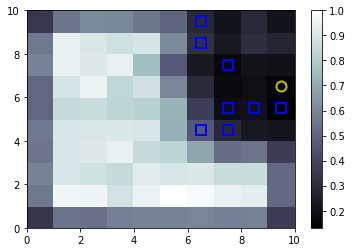

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['y', 'b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()